<a href="https://colab.research.google.com/github/varungowda02/Customer-Segmentation/blob/main/customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Clustering with PCA, KMeans and Agglomerative for a Marketing Campaign

#### [Author]:Yassine Sfaihi

## Introduction



This notebook provides an overview of the steps taken to process and explore the data in the marketing campaign data. The code uses Pandas and Plotly Express for data preprocessing, visualization, and exploration. The code also uses scikit-learn for dimensionality reduction using PCA and for clustering using KMeans and Agglomerative Clustering.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Data Science/Projects/P566 Customer Segmentation/marketing_campaign.xlsx', sheet_name='marketing_campaign')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
# Get the shape of the dataframe
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (2240, 29)


In [ ]:
# Get the head of the dataframe
print("\nFirst 5 rows of the dataframe:")
df.head()


First 5 rows of the dataframe:


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
# Get the tail of the dataframe
print("\nLast 5 rows of the dataframe:")
df.tail()


Last 5 rows of the dataframe:


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [ ]:
# Get the information about the dataframe
print("\nInformation about the dataframe:")
print(df.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13 

In [ ]:
# Get the summary statistics of the dataframe
print("\nSummary statistics of the dataframe:")
df.describe()


Summary statistics of the dataframe:


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00    49.000000   173.500000     8.000000   
75%              2013-12-30 06:00:00    74.000000   504.250000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.962453   336.597393    39.773434   

       MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean        166.950000  ...           5.316518      0.072768      0.074554   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%          16.000000  ...           3.000000      0.000000      0.000000   
50%          67.000000  ...           6.000000      0.000000      0.000000   
75%         232.000000  ...           7.000000      0.000000      0.000000   
max        1725.000000  ...          20.000000      1.000000      1.000000   
std         225.715373  ...           2.426645      0.259813      0.262728   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.356274  

[8 rows x 27 columns]

In [ ]:
# Get the data type of each column in the dataframe
print("\nData type of each column in the dataframe:")
print(df.dtypes)


Data type of each column in the dataframe:
ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Compla

# Data Preparation

### Missing Data

In [ ]:
# Check for missing data
print("Missing data in the dataframe:")
print(df.isnull().sum())


Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


<Axes: >

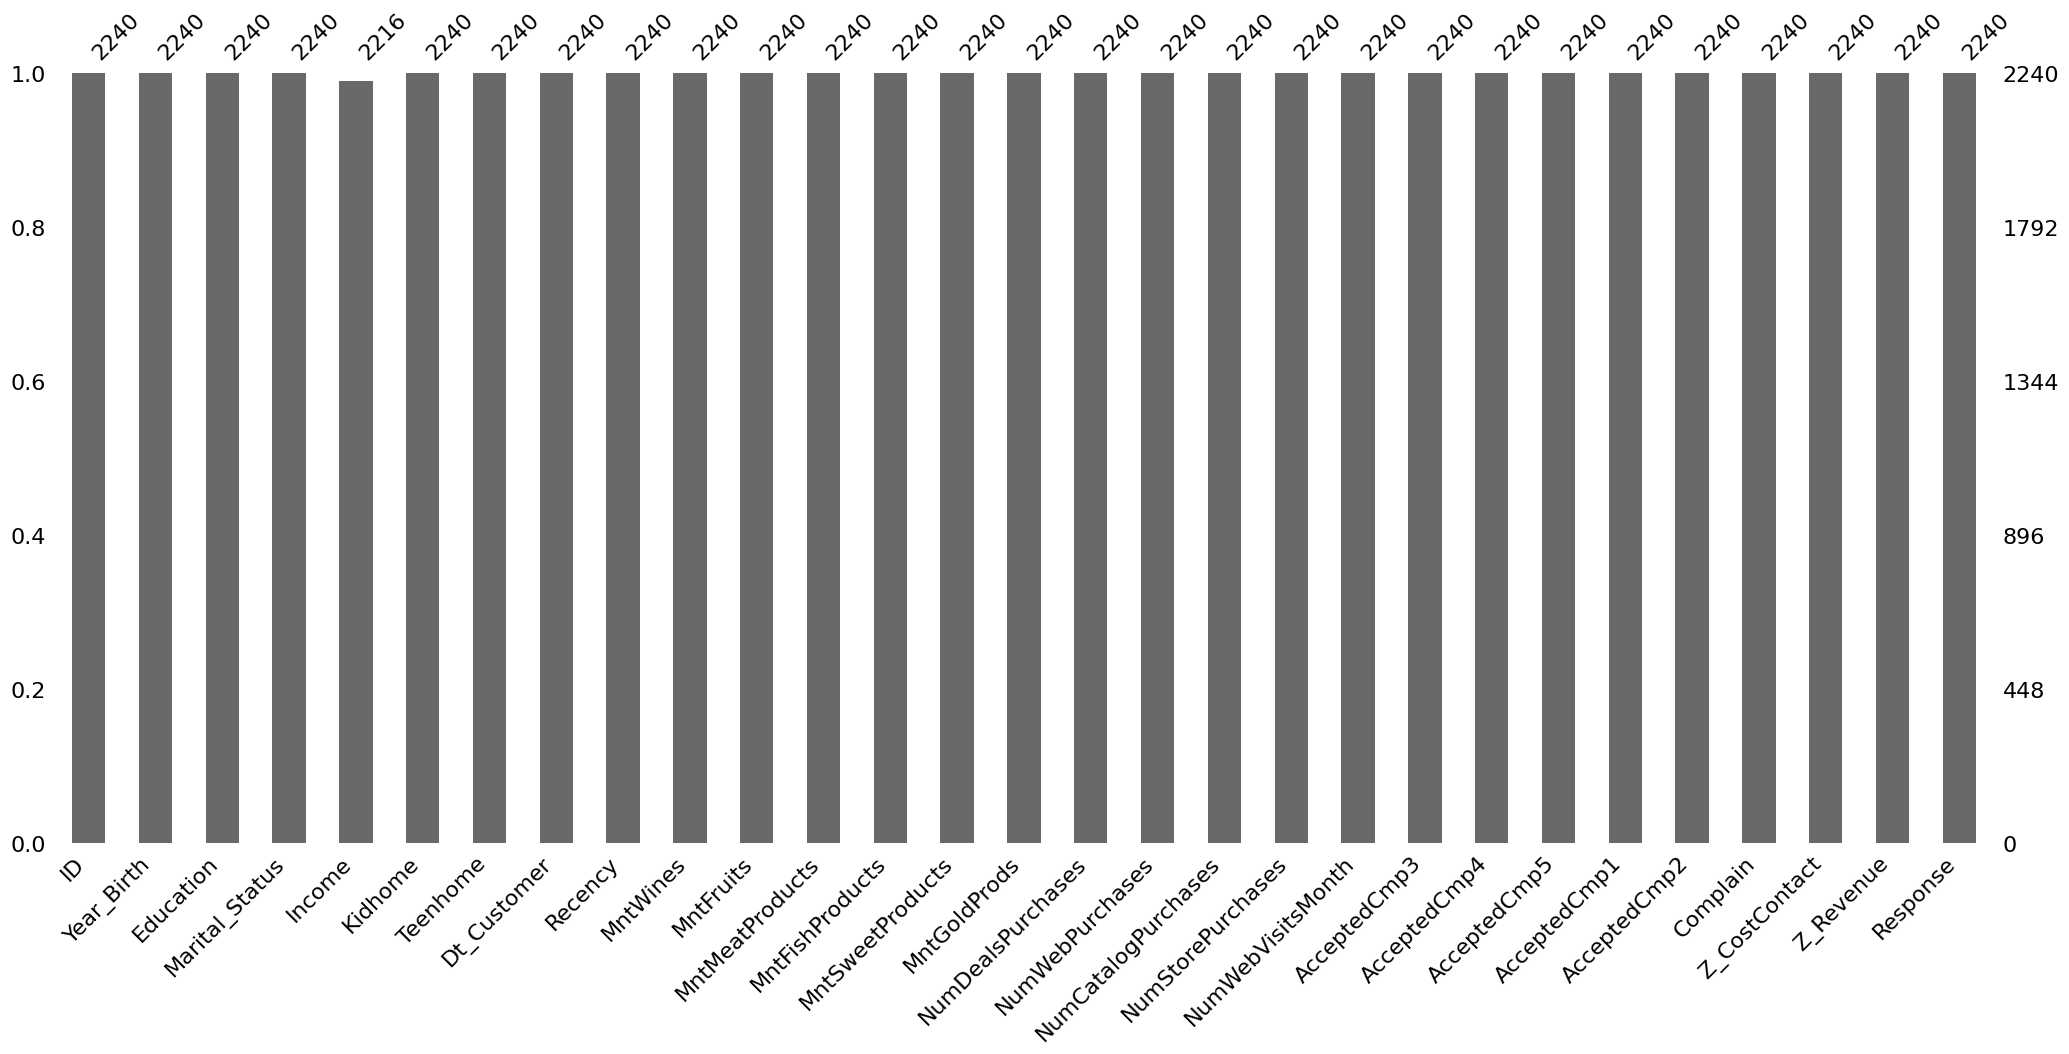

In [ ]:
import missingno as msno
# Visualize missing data

msno.bar(df)

<Axes: >

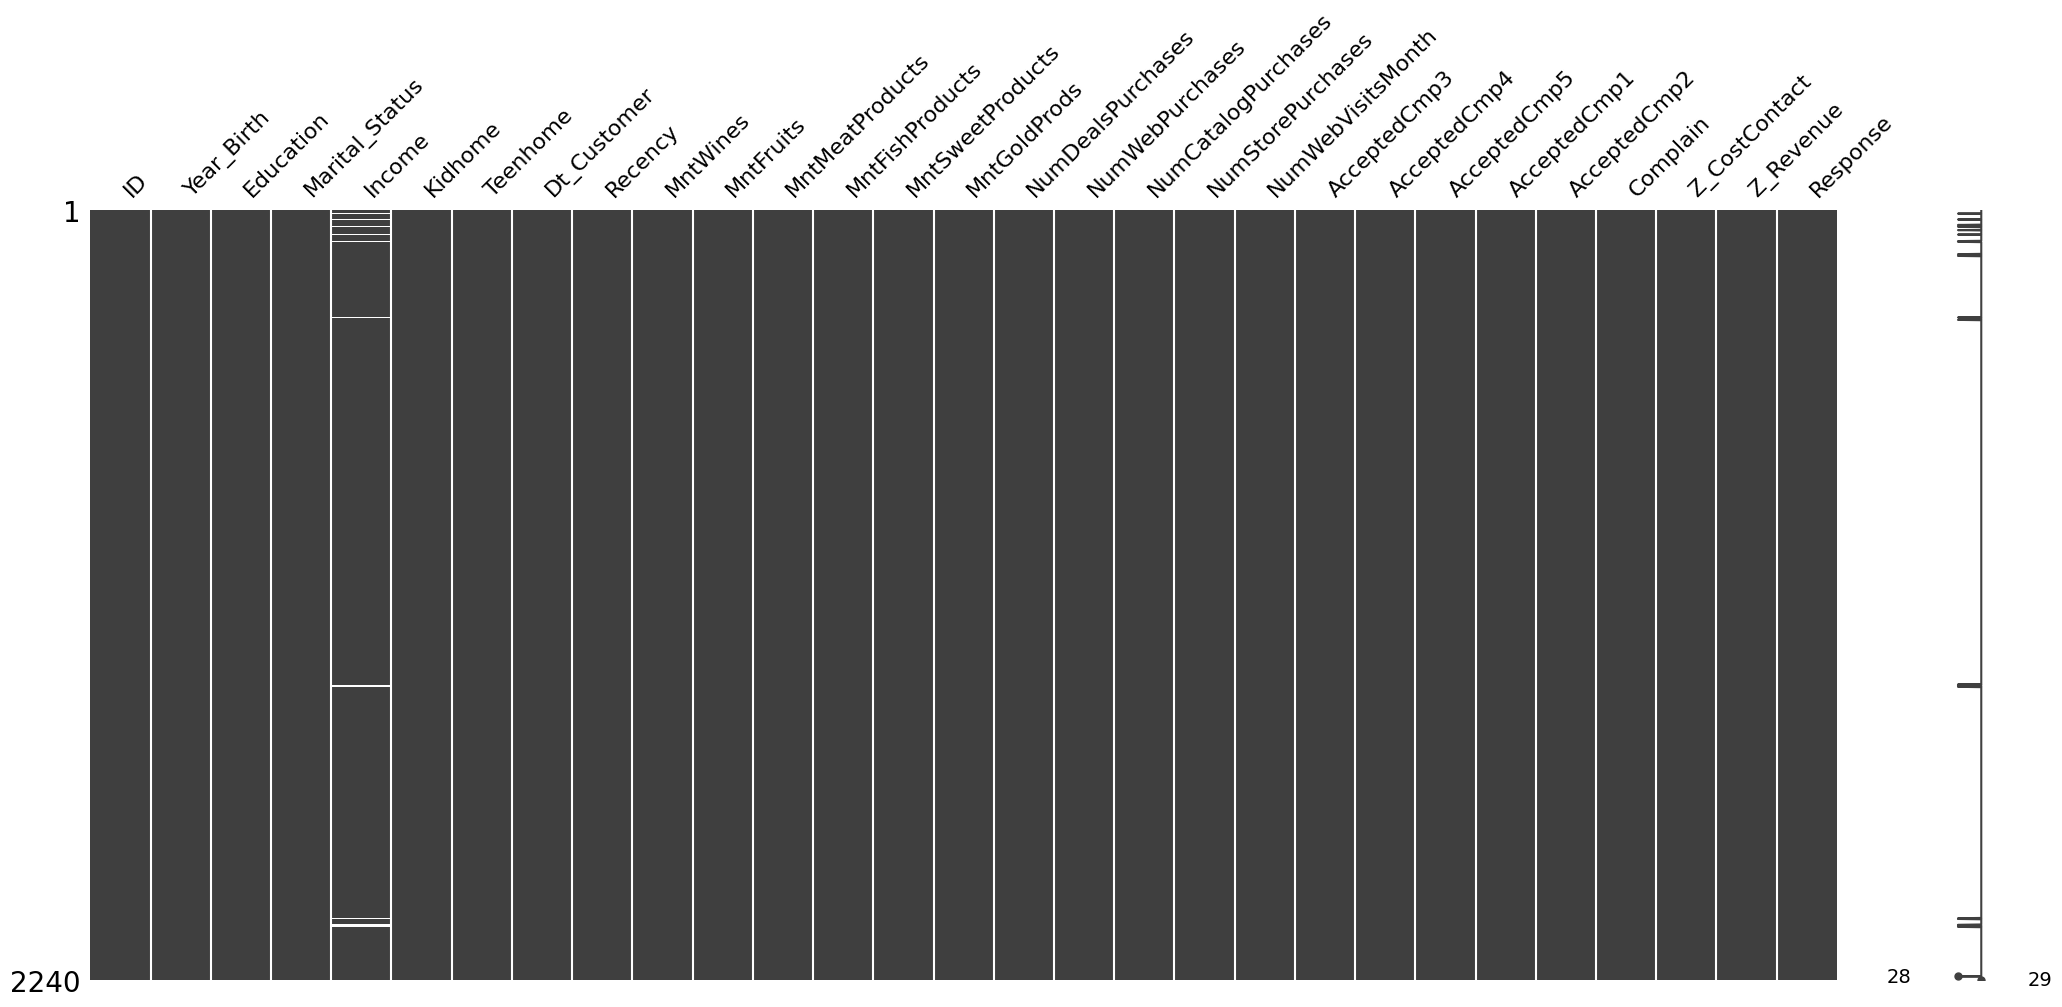

In [ ]:
# Visualize missing data
msno.matrix(df)


"Given that missing data exists only in one column and constitutes only a small proportion (24 out of 2240) of the total data, we have decided to drop these missing values without significantly affecting the overall integrity of the data."

In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()


np.int64(0)

### Outliers

In [ ]:
import matplotlib.pyplot as plt

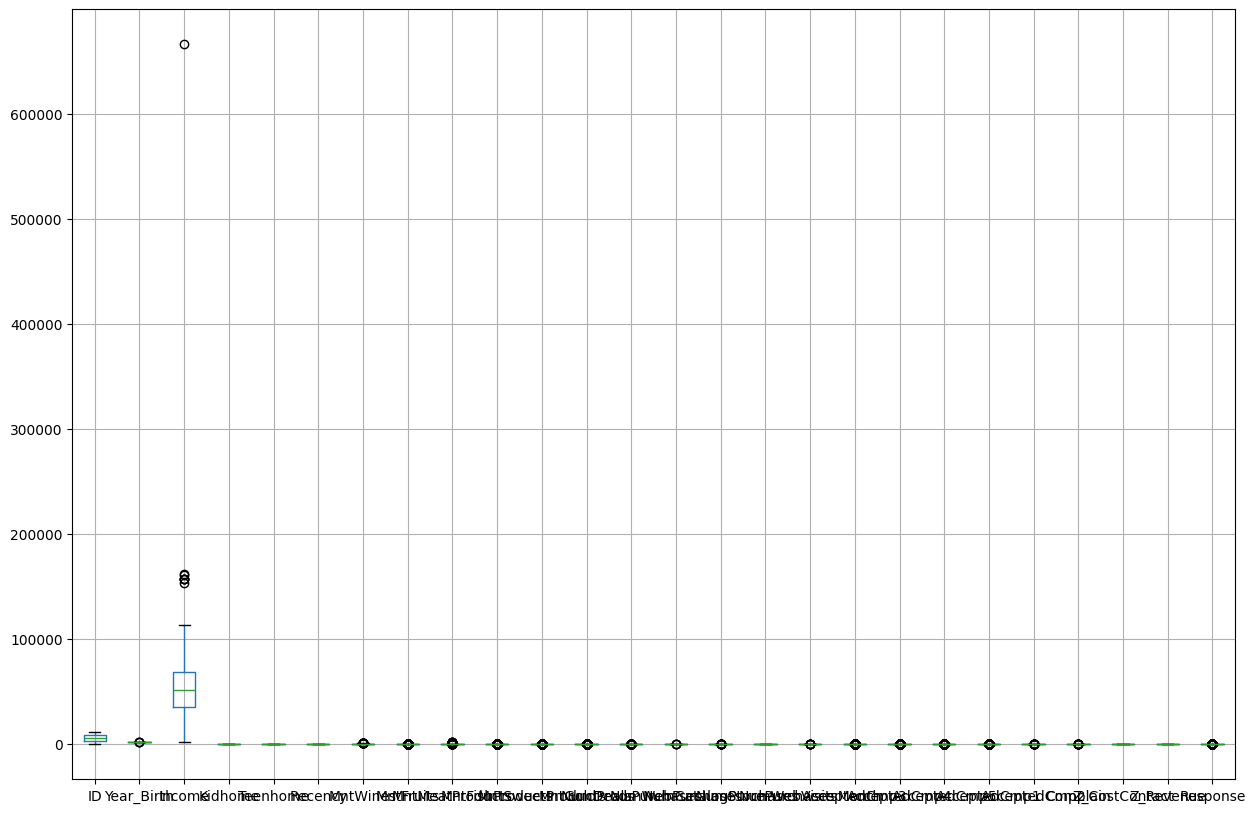

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the box plots for all columns
df.boxplot(ax=ax)

# Show the plot
plt.show()






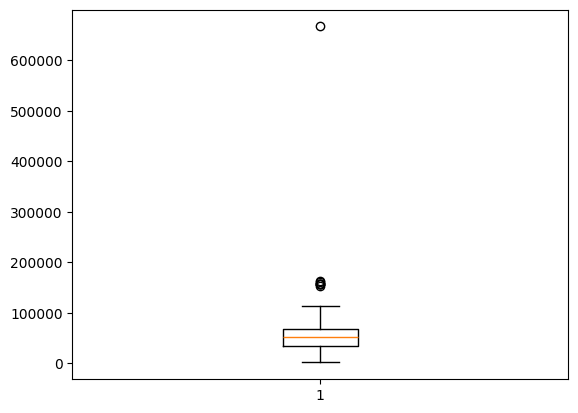

In [ ]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

In [ ]:

# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [ ]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Print the updated shape of the dataframe
print("Updated shape of the dataframe:", df.shape)

Updated shape of the dataframe: (2208, 29)


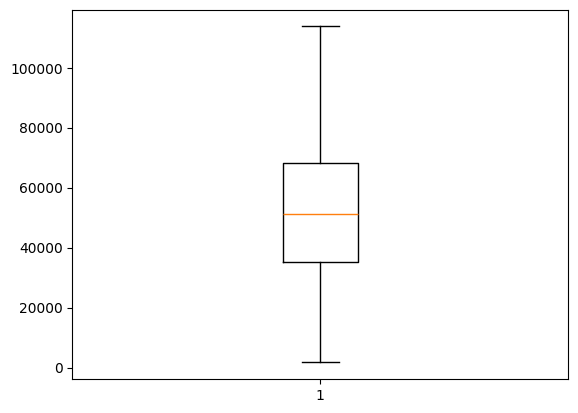

In [ ]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

# Feature engineering

### Creating new features/columns

In [ ]:
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())


Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(education_level)


In [ ]:
def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living with Others'

df['Living_Status'] = df['Marital_Status'].apply(living_status)


#### Creating Age

In [ ]:
df['Age'] = 2022 - df['Year_Birth']


#### Creating Total number of campaigns accepted

In [ ]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


#### Creating Average spend per purchase:


In [ ]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']
df['Average_Spend'] = df['Average_Spend'].replace([np.inf, -np.inf], np.nan)

#### Creating Spent

In [ ]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']


#### Creating  "Is_Parent" to indicate parenthood status:

In [ ]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)


#### Creating total spending in the last 2 years || average monthly visits to the company's website ||  ratio of online purchases to total purchases

In [ ]:
# create new feature for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])
df['online_purchase_ratio'] = df['online_purchase_ratio'].replace([np.inf, -np.inf], np.nan)

#### Dropping non relevant Columns/Features

In [ ]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)

In [ ]:
df.dtypes

Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Education_Level              object
Living_Status                object
Age                           int64
Total_Campaigns_Accepted      int64
Average_Spend               float64
Spent                         int64
Is_Parent                     int64
total_spending                int64
avg_web_visits              float64
online_purchase_ratio       float64
dtype: object

# Exploratory data analysis

### Distribution of Income


In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

This histogram shows the distribution of the Income column, which represents the income of each customer. The x-axis shows the range of incomes, and the y-axis shows the number of customers who fall into each range. The histogram helps us understand the spread of income among the customers, and whether there are any outliers or anomalies in the data.

In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
import plotly.express as px


fig0 = px.histogram(df, x="Income", nbins=50)
fig0.show()


### Distribution of Age

This code will plot a histogram showing the distribution of the 'Age' column in the data. The x-axis will represent the age and the y-axis will represent the count of customers with that ag

In [ ]:

fig1 = px.histogram(df, x="Age", nbins=30, color='Age', title="Distribution of Age")
fig1.show()


### Marital Status Distribution

The  plot shows the distribution of customers based on their marital status, which can be useful in understanding the different family structures

In [ ]:
# Marital Status Distribution
fig2 = px.histogram(df, x='Marital_Status', nbins=5, title="Marital Status Distribution")
fig2.show()


### Education Level Distribution

The  plot shows the distribution of customers based on their education level, which can be useful in understanding the level of education and potentially the level of income of the customers

In [ ]:

# Education Level Distribution
fig3 = px.histogram(df, x='Education_Level', nbins=5, title="Education Level Distribution")
fig3.show()

### Average Spend by Marital Status

In [ ]:
import plotly.express as px

df_plot = df.groupby(['Marital_Status'])['Average_Spend'].mean().reset_index()

fig4 = px.bar(df_plot, x='Marital_Status', y='Average_Spend', color='Marital_Status')

fig4.show()


### Average Spend by Education Leve

In [ ]:

df_plot = df.groupby(['Education_Level'])['Average_Spend'].mean().reset_index()

fig5 = px.bar(df_plot, x='Education_Level', y='Average_Spend', color='Education_Level')

fig5.show()


These plots aim to visualize the relationship between marital status/education level and average spend, which can help to identify segments of customers with similar spending patterns.

### the distribution of number of children in household

This plot shows the distribution of the number of children in households. It helps to see the number of households with 0 children, 1 child, 2 children, etc.

In [ ]:
# Plot the distribution of number of children in household
fig6 = px.histogram(df, x='Kidhome')
fig6.show()

### the distribution of number of teenagers in household

this plot shows the distribution of the number of teenagers in households. It helps to see the number of households with 0 teenagers, 1 teenager, 2 teenagers, etc.

In [ ]:
# Plot the distribution of number of teenagers in household
fig7 = px.histogram(df, x='Teenhome')
fig7.show()

### "Total Campaigns Accepted Distribution"

"Total Campaigns Accepted Distribution", we are plotting a histogram of the Total_Campaigns_Accepted column. This plot will show us the distribution of the number of campaigns accepted by each customer.

In [ ]:
# Total Campaigns Accepted Distribution
fig8 = px.histogram(df, x='Total_Campaigns_Accepted', nbins=20, title="Total Campaigns Accepted Distribution")
fig8.show()



 ### "Average Spend per Purchase Distribution"

 "Average Spend per Purchase Distribution", we are plotting a histogram of the Average_Spend column. This plot will show us the distribution of the average spend per purchase made by each customer.

In [ ]:
# Average Spend per Purchase Distribution
fig9 = px.histogram(df, x='Average_Spend', nbins=20, title="Average Spend per Purchase Distribution")
fig9.show()

### Spending Distribution by Marital Status
### Spending Distribution by Education Level
### Spending Distribution by Is_Parent

These plots aim to show the distribution of spending across different categories of Marital Status, Education Level and Is_Parent. The histograms allow us to see the frequency of different spending levels in each category and to compare the spending distributions across categories.

In [ ]:
fig10 = px.histogram(df, x='total_spending', color='Marital_Status', nbins=50,
                   title='Spending Distribution by Marital Status')
fig11 = px.histogram(df, x='total_spending', color='Education_Level', nbins=50,
                   title='Spending Distribution by Education Level')
fig12 = px.histogram(df, x='total_spending', color='Is_Parent', nbins=50,
                   title='Spending Distribution by Is_Parent')

fig10.show()
fig11.show()
fig12.show()

### the Distribution of Online Purchase Ratio

In [ ]:
# Plot the Distribution of Online Purchase Ratio
fig13 = px.histogram(df, x='online_purchase_ratio')
fig13.show()


In [ ]:

# Plot the Distribution of Number of Web Visits per Month
fig14 = px.histogram(df, x='NumWebVisitsMonth')
fig14.show()


### the Distribution of Number of Web Purchases

In [ ]:

# Plot the Distribution of Number of Web Purchases
fig15 = px.histogram(df, x='NumWebPurchases')
fig15.show()


### Distribution of Number of Catalog Purchases

In [ ]:

# Plot the Distribution of Number of Catalog Purchases
fig16 = px.histogram(df, x='NumCatalogPurchases')
fig16.show()



### Distribution of Number of Store Purchases

In [ ]:
# Plot the Distribution of Number of Store Purchases
fig17 = px.histogram(df, x='NumStorePurchases')
fig17.show()

### "NumWebPurchases" vs "NumStorePurchases"

"NumWebPurchases" vs "NumStorePurchases" to see if there is a relationship between the two types of purchases. The box plot shows the median, first and third quartiles, and outliers of the data.

In [ ]:
# box plot of NumWebPurchases vs NumStorePurchases
fig18 = px.box(df, x="NumWebPurchases", y="NumStorePurchases")
fig18.show()

###  scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth"

scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth" to see if there is a correlation between web purchases and visits. The scatter plot shows the relationship between two variables as individual data points. A positive correlation is indicated by the points moving from lower left to upper right, while a negative correlation is indicated by the points moving from upper left to lower right.

In [ ]:
# scatter plot of NumWebPurchases vs NumWebVisitsMonth
fig19 = px.scatter(df, x="NumWebPurchases", y="NumWebVisitsMonth")
fig19.show()

###  Scatter plot of "MntFruits" vs "MntMeatProducts"

The  scatter plot shows the relationship between the amount spent on fruits and the amount spent on meat products.


In [ ]:
# Scatter plot of "MntFruits" vs "MntMeatProducts"
fig20 = px.scatter(df, x="MntFruits", y="MntMeatProducts")
fig20.show()

###  Scatter plot of "MntWines" vs "MntSweetProducts"

The scatter plot shows the relationship between the amount spent on wines and the amount spent on sweet products.


In [ ]:
# Scatter plot of "MntWines" vs "MntSweetProducts"
fig21 = px.scatter(df, x="MntWines", y="MntSweetProducts")
fig21.show()


### Scatter plot of "MntWines" vs "MntSweetProducts" with a "Income"

The scatter plot shows the relationship between the amount spent on wines and the amount spent on sweet products, with a third variable represented by size. The size of the marker represents the number of web visits per month, and the color of the marker represents the income level

In [ ]:
# Scatter plot of "MntWines" vs "MntSweetProducts" with a third variable represented by size or color
fig22 = px.scatter(df, x="MntWines", y="MntSweetProducts", size="NumWebVisitsMonth", color="Income", size_max=50)
fig22.show()


###  Violin plot of "AcceptedCmp1" vs "AcceptedCmp2"
###  Violin plot of "AcceptedCmp3" vs "AcceptedCmp4"


A violin plot is a type of box plot that shows the probability density of the data at different values. The violin plot shows the distribution of the data, including the median, quartiles, and the distribution of the data. In this case, we are using the violin plot to see if there is a relationship between the two campaigns (AcceptedCmp1 vs AcceptedCmp2 and AcceptedCmp3 vs AcceptedCmp4). If there is a relationship between the two campaigns, then the violin plots will show similar shapes and distributions, indicating that the customers who accepted one campaign are likely to accept the other campaign as well.

In [ ]:
# Create the violin plots
fig23 = px.violin(df, x="AcceptedCmp1", y="AcceptedCmp2", box=True, points="all")
fig23.update_layout(title="AcceptedCmp1 vs AcceptedCmp2", xaxis_title="AcceptedCmp1", yaxis_title="AcceptedCmp2")

fig24 = px.violin(df, x="AcceptedCmp3", y="AcceptedCmp4", box=True, points="all")
fig24.update_layout(title="AcceptedCmp3 vs AcceptedCmp4", xaxis_title="AcceptedCmp3", yaxis_title="AcceptedCmp4")

# Show the plots
fig23.show()
fig24.show()

###  Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases"

In [ ]:
# Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases"
fig25 = px.scatter(df, x="NumDealsPurchases", y="NumCatalogPurchases", trendline="ols")
fig25.show()



###  Pairplot of "Income", "NumWebPurchases", and "NumStorePurchases"

In [ ]:
# Pairplot of "Income", "NumWebPurchases", and "NumStorePurchases"
fig26 = px.scatter_matrix(df, dimensions=["Income", "NumWebPurchases", "NumStorePurchases"])
fig26.show()


In [ ]:
import plotly.express as px
import plotly.io as pio

for i in range(27):
    fig = eval(f"fig{i}")
    pio.write_html(fig, file=f'fig{i}.html', auto_play=True)


In [ ]:
df.dtypes

Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Education_Level              object
Living_Status                object
Age                           int64
Total_Campaigns_Accepted      int64
Average_Spend               float64
Spent                         int64
Is_Parent                     int64
total_spending                int64
avg_web_visits              float64
online_purchase_ratio       float64
dtype: object

# Clustering

## One-hot encoding

In [ ]:
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=["Marital_Status", "Education","Education_Level","Living_Status"])

## Data Scaling StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler


# Select the numerical columns to scale
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
            'total_spending', 'avg_web_visits', 'online_purchase_ratio', 'Age',
            'Total_Campaigns_Accepted', 'Is_Parent']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# PCA

In [ ]:
# Drop rows with NaN values in the 'online_purchase_ratio' column
df.dropna(subset=['online_purchase_ratio'], axis=0, inplace=True)

In [ ]:
from sklearn.decomposition import PCA

# Drop rows with NaN values after handling infinities
df.dropna(inplace=True)

# Initialize the PCA model
pca = PCA(n_components=8)

# Fit and transform the data
df_pca = pca.fit_transform(df)

# Determining the optimal number of clusters using Silhouette Score

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))

best_k = list_k[np.argmax(silhouette_scores)]


In [ ]:
best_k

2

In [ ]:
silhouette_scores

[np.float64(0.6551550540705939),
 np.float64(0.6218305261649765),
 np.float64(0.5732982076421559),
 np.float64(0.5983451323894095),
 np.float64(0.5892132202743785),
 np.float64(0.5994276932840255),
 np.float64(0.5870350587903631),
 np.float64(0.5561648296129371)]

# kmeans

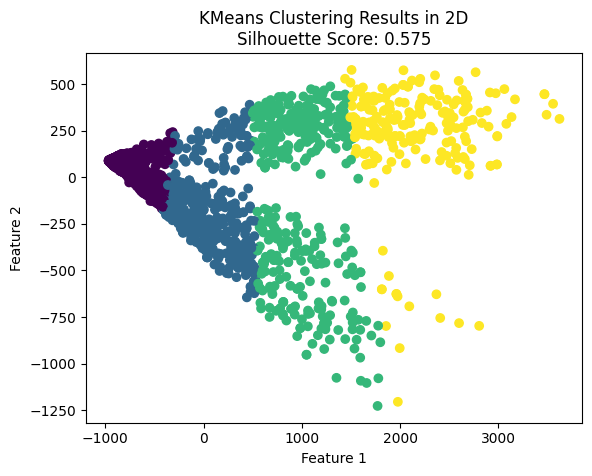

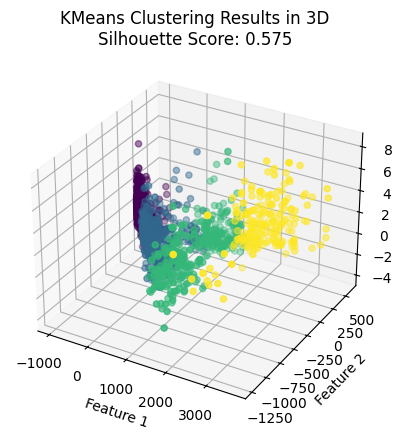

In [ ]:
from sklearn.metrics import silhouette_score
# Fit the KMeans model with the number of clusters set to 3
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

# Get the predictions
predictions = kmeans.predict(df_pca)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(df_pca, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(df_pca, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(df_pca, predictions)

# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=predictions, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Results in 3D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Agglomerative Clustering

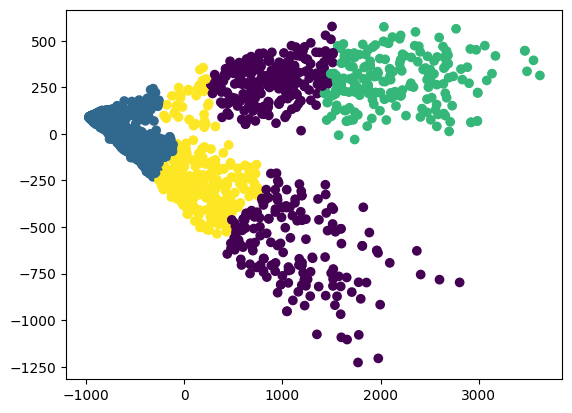

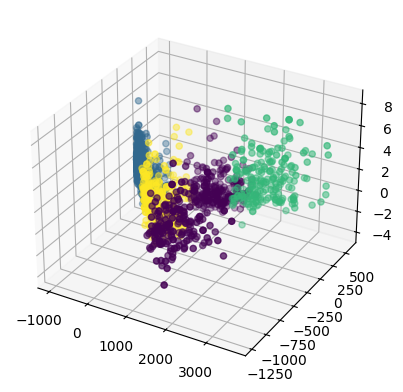

Davies-Bouldin Index: 0.8327486540633545
Silhouette Score: 0.5445970485318323
Calinski-Harabasz Index: 5062.266700983213


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

# Generate sample data
X = df_pca

# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(X))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(X)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Plot the data points colored by their cluster labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, agg_cluster.labels_)
print("Davies-Bouldin Index:", davies_bouldin_index)
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X, agg_cluster.labels_)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(X, agg_cluster.labels_)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Index:", calinski_harabasz_score_value)

## Summary:


The code starts by loading a tab-separated file into a Pandas dataframe. It then performs various operations to understand the structure and content of the data, including getting the number of rows and columns, checking for missing data, and getting summary statistics. The code then performs data preprocessing, including one-hot encoding of categorical variables and scaling of numerical variables. The data is then reduced to 8 components using PCA, and two clustering algorithms (KMeans and Agglomerative Clustering) are applied to the data.

Finally, various evaluation metrics are used to assess the quality of the clustering results. The code visualizes the results of the clustering, as well as the relationships between different variables in the data, through various types of plots, including histograms, box plots, scatter plots, violin plots, and pair plots.

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set page config
st.set_page_config(
    page_title="Customer Clustering Model",
    page_icon="🎯",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS
st.markdown("""
<style>
    .main-header {
        font-size: 3rem;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 2rem;
        background: linear-gradient(90deg, #667eea, #764ba2);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        font-weight: bold;
    }
    .metric-card {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        padding: 1rem;
        border-radius: 10px;
        color: white;
        margin: 0.5rem 0;
    }
    .cluster-result {
        font-size: 2rem;
        font-weight: bold;
        text-align: center;
        padding: 1rem;
        border-radius: 10px;
        margin: 1rem 0;
    }
    .sidebar-info {
        background-color: #f0f2f6;
        padding: 1rem;
        border-radius: 5px;
        margin-bottom: 1rem;
    }
</style>
""", unsafe_allow_html=True)

class CustomerClusteringModel:
    """
    A comprehensive customer clustering model that replicates the preprocessing
    and clustering approach from the original analysis.
    """

    def __init__(self):
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=8)
        self.kmeans_model = None
        self.agg_model = None
        self.feature_columns = None
        self.is_fitted = False
        self.cluster_profiles = {}
        # Store the index after preprocessing during training
        self.fitted_index = None

    def preprocess_data(self, df):
        """Apply the same preprocessing steps as in the original analysis"""
        df_processed = df.copy()

        # Handle missing values (drop if small percentage)
        missing_ratio = df_processed.isnull().sum() / len(df_processed)
        if missing_ratio.any() and missing_ratio.max() < 0.05:
            # Keep track of the original index before dropping
            initial_index = df_processed.index
            df_processed = df_processed.dropna()
            # Return the new index after dropping
            return df_processed, df_processed.index.tolist()
        else:
             return df_processed, df_processed.index.tolist()

    def feature_engineering(self, df):
        """Create the same engineered features as in the original analysis"""
        df_eng = df.copy()

        # Education Level grouping
        if 'Education' in df_eng.columns:
            def education_level(education):
                if education in ['Graduation', 'PhD', 'Master']:
                    return 'High'
                elif education in ['Basic']:
                    return 'Middle'
                else:
                    return 'Low'
            df_eng['Education_Level'] = df_eng['Education'].apply(education_level)

        # Living Status based on Marital Status
        if 'Marital_Status' in df_eng.columns:
            def living_status(marital_status):
                if marital_status in ['Alone', 'Absurd', 'YOLO']:
                    return 'Living Alone'
                else:
                    return 'Living with Others'
            df_eng['Living_Status'] = df_eng['Marital_Status'].apply(living_status)

        # Age calculation
        if 'Year_Birth' in df_eng.columns:
            df_eng['Age'] = 2022 - df_eng['Year_Birth']

        # Total campaigns accepted
        campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
        if all(col in df_eng.columns for col in campaign_cols):
            df_eng['Total_Campaigns_Accepted'] = df_eng[campaign_cols].sum(axis=1)

        # Average spend per purchase
        spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
        if all(col in df_eng.columns for col in spend_cols) and 'NumDealsPurchases' in df_eng.columns:
            total_spend = df_eng[spend_cols].sum(axis=1)
            # Replace 0 in NumDealsPurchases to avoid division by zero, resulting in NaN
            df_eng['Average_Spend'] = total_spend / df_eng['NumDealsPurchases'].replace(0, np.nan)
            df_eng['Average_Spend'] = df_eng['Average_Spend'].replace([np.inf, -np.inf], np.nan)


        # Total spending
        if all(col in df_eng.columns for col in spend_cols):
            df_eng['Spent'] = df_eng[spend_cols].sum(axis=1)
            df_eng['total_spending'] = df_eng['Spent']

        # Is Parent
        if 'Kidhome' in df_eng.columns and 'Teenhome' in df_eng.columns:
            df_eng['Is_Parent'] = (df_eng['Kidhome'] + df_eng['Teenhome'] > 0).astype(int)

        # Average web visits
        if 'NumWebVisitsMonth' in df_eng.columns:
            # Avoid division by zero if there are no months in the data (unlikely but safe)
            df_eng['avg_web_visits'] = df_eng['NumWebVisitsMonth'] / 12 if 12 != 0 else np.nan


        # Online purchase ratio
        purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
        if all(col in df_eng.columns for col in purchase_cols):
            total_purchases = df_eng[purchase_cols].sum(axis=1)
            # Replace 0 in total_purchases to avoid division by zero, resulting in NaN
            df_eng['online_purchase_ratio'] = df_eng['NumWebPurchases'] / total_purchases.replace(0, np.nan)
            df_eng['online_purchase_ratio'] = df_eng['online_purchase_ratio'].replace([np.inf, -np.inf], np.nan)


        # Drop non-relevant columns if they exist
        columns_to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
        df_eng = df_eng.drop([col for col in columns_to_drop if col in df_eng.columns], axis=1)

        return df_eng

    def prepare_features(self, df):
        """Prepare features for clustering (one-hot encoding and handling NaN)"""
        df_prep = df.copy()

        # One-hot encode categorical variables
        categorical_cols_to_encode = ['Marital_Status', 'Education', 'Education_Level', 'Living_Status']
        existing_categorical_cols = [col for col in categorical_cols_to_encode if col in df_prep.columns]

        if existing_categorical_cols:
            df_prep = pd.get_dummies(df_prep, columns=existing_categorical_cols)

        # Handle any remaining NaN values after feature engineering
        # Fill with the mean of the column (calculated from training data)
        # You might need to store these means during the fit method
        # For now, fill with 0, but improve this for production
        df_prep = df_prep.fillna(0)


        return df_prep

    def fit(self, df, n_clusters=4):
        """Fit the clustering models on the training data"""
        # Apply preprocessing pipeline and get the index of the processed data
        df_processed, self.fitted_index = self.preprocess_data(df)
        df_engineered = self.feature_engineering(df_processed)
        df_prepared = self.prepare_features(df_engineered)

        # Store feature columns for later use
        self.feature_columns = df_prepared.columns.tolist()

        # Scale numerical features
        df_scaled = self.scaler.fit_transform(df_prepared)

        # Apply PCA
        df_pca = self.pca.fit_transform(df_scaled)

        # Fit KMeans
        self.kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Add n_init for robustness
        kmeans_labels = self.kmeans_model.fit_predict(df_pca)

        # Fit Agglomerative Clustering (optional, but keeping for consistency)
        self.agg_model = AgglomerativeClustering(n_clusters=n_clusters)
        agg_labels = self.agg_model.fit_predict(df_pca)

        # Create cluster profiles using the engineered features and the original index
        df_with_clusters = df_engineered.copy() # Use engineered data for profiling
        df_with_clusters['Cluster'] = pd.Series(kmeans_labels, index=df_with_clusters.index) # Assign labels with correct index
        self.cluster_profiles = self._create_cluster_profiles(df_with_clusters)

        self.is_fitted = True
        return self

    def _create_cluster_profiles(self, df):
        """Create profiles for each cluster"""
        profiles = {}
        if 'Cluster' in df.columns:
            for cluster in df['Cluster'].unique():
                cluster_data = df[df['Cluster'] == cluster]
                profiles[cluster] = {
                    'size': len(cluster_data),
                    'avg_income': cluster_data.get('Income', pd.Series([0])).mean(),
                    'avg_age': cluster_data.get('Age', pd.Series([0])).mean(),
                    'avg_spending': cluster_data.get('total_spending', pd.Series([0])).mean(),
                    'parent_ratio': cluster_data.get('Is_Parent', pd.Series([0])).mean(),
                    # Add other relevant metrics for profiling
                }
        return profiles


    def predict(self, df):
        """Predict clusters for new data"""
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")

        # Store the original index for mapping predictions back
        original_index = df.index

        # Apply the same preprocessing pipeline. Get the processed data and its index.
        df_processed, processed_index = self.preprocess_data(df)
        df_engineered = self.feature_engineering(df_processed)
        df_prepared = self.prepare_features(df_engineered)

        # Ensure same features as training
        # This is crucial for consistent column order and presence
        for col in self.feature_columns:
            if col not in df_prepared.columns:
                df_prepared[col] = 0

        # Select only training features and in the same order
        df_prepared = df_prepared.reindex(columns=self.feature_columns, fill_value=0)

        # Handle any potential NaNs introduced by reindexing or previous steps
        df_prepared.fillna(0, inplace=True)


        # Scale and transform
        df_scaled = self.scaler.transform(df_prepared)
        df_pca = self.pca.transform(df_scaled)

        # Predict with KMeans
        kmeans_predictions = self.kmeans_model.predict(df_pca)

        # Create a Series of predictions with the index of the processed data
        predictions_series = pd.Series(kmeans_predictions, index=processed_index)

        # Create a Series of predictions for the original DataFrame, filling missing values (for dropped rows) with NaN or a placeholder
        # This aligns the predictions with the original index
        full_predictions = pd.Series(np.nan, index=original_index)
        full_predictions.loc[processed_index] = predictions_series.values


        return {
            'kmeans_clusters': full_predictions, # Return predictions aligned with original index
            'pca_features': df_pca # Note: PCA features are only for the processed rows
        }

# Initialize session state
if 'model' not in st.session_state:
    st.session_state.model = CustomerClusteringModel()
    st.session_state.model_trained = False

# Main app
def main():
    st.markdown('<h1 class="main-header">🎯 Customer Clustering Model</h1>', unsafe_allow_html=True)

    # Sidebar
    with st.sidebar:
        st.markdown('<div class="sidebar-info"><h3>📊 Model Information</h3></div>', unsafe_allow_html=True)

        if st.session_state.model_trained:
            st.success("✅ Model is trained and ready!")
        else:
            st.warning("⚠️ Please train the model first")

        st.markdown("---")
        st.markdown("### Navigation")

        # Page selection
        page = st.selectbox(
            "Choose a page:",
            ["🏠 Home", "🔧 Train Model", "🔮 Single Prediction", "📊 Batch Analysis", "📈 Model Insights"]
        )

    # Main content based on page selection
    if page == "🏠 Home":
        show_home_page()
    elif page == "🔧 Train Model":
        show_train_page()
    elif page == "🔮 Single Prediction":
        show_prediction_page()
    elif page == "📊 Batch Analysis":
        show_batch_page()
    elif page == "📈 Model Insights":
        show_insights_page()

def show_home_page():
    st.markdown("## Welcome to the Customer Clustering Application")

    col1, col2, col3 = st.columns(3)

    with col1:
        st.markdown("""
        ### 🎯 About This App
        This application implements the exact same customer clustering model from your analysis, including:
        - Data preprocessing and feature engineering
        - PCA dimensionality reduction
        - KMeans and Agglomerative clustering
        - Interactive visualization
        """)

    with col2:
        st.markdown("""
        ### 🔄 Workflow
        1. **Train Model**: Upload your data to train the clustering model
        2. **Make Predictions**: Classify individual customers
        3. **Batch Analysis**: Analyze multiple customers at once
        4. **View Insights**: Explore cluster characteristics
        """)

    with col3:
        st.markdown("""
        ### 📊 Features
        - Real-time predictions
        - Interactive visualizations
        - Cluster profiling
        - Downloadable results
        - Model persistence
        """)

    st.markdown("---")
    st.info("👈 Use the sidebar to navigate between different sections of the application.")

def show_train_page():
    st.markdown("## 🔧 Train Clustering Model")

    st.markdown("""
    Upload your marketing campaign dataset to train the clustering model.
    The model will apply the same preprocessing steps as your original analysis.
    """)

    # File upload
    uploaded_file = st.file_uploader(
        "Choose your dataset file",
        type=['csv', 'xlsx', 'xls'],
        help="Upload your marketing campaign dataset"
    )

    if uploaded_file is not None:
        try:
            # Read the file
            if uploaded_file.name.endswith('.csv'):
                df = pd.read_csv(uploaded_file)
            else:
                df = pd.read_excel(uploaded_file)

            st.success(f"✅ File uploaded successfully! Shape: {df.shape}")

            # Show data preview
            with st.expander("Preview Data"):
                st.dataframe(df.head())

            # Training parameters
            col1, col2 = st.columns(2)
            with col1:
                n_clusters = st.slider("Number of Clusters", 2, 10, 4)
            with col2:
                train_button = st.button("🚀 Train Model", type="primary")

            if train_button:
                with st.spinner("Training model... This may take a few minutes."):
                    try:
                        # Train the model
                        st.session_state.model.fit(df, n_clusters=n_clusters)
                        st.session_state.model_trained = True

                        st.success("🎉 Model trained successfully!")

                        # Show training summary
                        col1, col2, col3 = st.columns(3)
                        with col1:
                            st.metric("Data Points (after processing)", len(st.session_state.model.fitted_index))
                        with col2:
                            st.metric("Features", len(st.session_state.model.feature_columns))
                        with col3:
                            st.metric("Clusters", n_clusters)

                        # PCA information
                        explained_variance = st.session_state.model.pca.explained_variance_ratio_
                        st.markdown("### PCA Explained Variance")
                        st.bar_chart(pd.DataFrame({
                            'Component': [f'PC{i+1}' for i in range(len(explained_variance))],
                            'Explained Variance': explained_variance
                        }).set_index('Component'))

                    except Exception as e:
                        st.error(f"❌ Error training model: {str(e)}")

        except Exception as e:
            st.error(f"❌ Error reading file: {str(e)}")

def show_prediction_page():
    st.markdown("## 🔮 Single Customer Prediction")

    if not st.session_state.model_trained:
        st.warning("⚠️ Please train the model first using the 'Train Model' page.")
        return

    st.markdown("Enter customer details to predict their cluster segment:")

    # Create input form
    with st.form("prediction_form"):
        col1, col2, col3 = st.columns(3)

        with col1:
            st.markdown("#### 👤 Demographics")
            year_birth = st.number_input("Year of Birth", min_value=1940, max_value=2005, value=1970)
            income = st.number_input("Income", min_value=0.0, value=58138.0, step=1000.0)
            education = st.selectbox("Education", ["Graduation", "PhD", "Master", "Basic", "2n Cycle"])
            marital_status = st.selectbox("Marital Status",
                                        ["Single", "Together", "Married", "Divorced", "Widow", "Alone", "Absurd", "YOLO"])

        with col2:
            st.markdown("#### 🏠 Household")
            kidhome = st.number_input("Kids at Home", min_value=0, max_value=10, value=0)
            teenhome = st.number_input("Teens at Home", min_value=0, max_value=10, value=0)
            recency = st.number_input("Days Since Last Purchase", min_value=0, value=58)
            web_visits = st.number_input("Web Visits per Month", min_value=0, value=7)

        with col3:
            st.markdown("#### 💰 Spending (Last 2 Years)")
            mnt_wines = st.number_input("Wines", min_value=0.0, value=635.0)
            mnt_fruits = st.number_input("Fruits", min_value=0.0, value=88.0)
            mnt_meat = st.number_input("Meat Products", min_value=0.0, value=164.0)
            mnt_fish = st.number_input("Fish Products", min_value=0.0, value=111.0)
            mnt_sweet = st.number_input("Sweet Products", min_value=0.0, value=21.0)
            mnt_gold = st.number_input("Gold Products", min_value=0.0, value=42.0)

        col4, col5 = st.columns(2)
        with col4:
            st.markdown("#### 🛒 Purchase Behavior")
            num_deals = st.number_input("Deals Purchases", min_value=0, value=3)
            num_web = st.number_input("Web Purchases", min_value=0, value=8)
            num_catalog = st.number_input("Catalog Purchases", min_value=0, value=10)
            num_store = st.number_input("Store Purchases", min_value=0, value=4)

        with col5:
            st.markdown("#### 📢 Campaign Response")
            accepted_cmp1 = st.selectbox("Accepted Campaign 1", [0, 1])
            accepted_cmp2 = st.selectbox("Accepted Campaign 2", [0, 1])
            accepted_cmp3 = st.selectbox("Accepted Campaign 3", [0, 1])
            accepted_cmp4 = st.selectbox("Accepted Campaign 4", [0, 1])
            accepted_cmp5 = st.selectbox("Accepted Campaign 5", [0, 1])
            response = st.selectbox("Response to Last Campaign", [0, 1])
            complain = st.selectbox("Complain in Last 2 Years", [0, 1])

        submitted = st.form_submit_button("🎯 Predict Cluster", type="primary")

        if submitted:
            # Create input DataFrame with necessary columns for feature engineering
            input_data = pd.DataFrame({
                'Year_Birth': [year_birth],
                'Education': [education],
                'Marital_Status': [marital_status],
                'Income': [income],
                'Kidhome': [kidhome],
                'Teenhome': [teenhome],
                'Recency': [recency],
                'MntWines': [mnt_wines],
                'MntFruits': [mnt_fruits],
                'MntMeatProducts': [mnt_meat],
                'MntFishProducts': [mnt_fish],
                'MntSweetProducts': [mnt_sweet],
                'MntGoldProds': [mnt_gold],
                'NumDealsPurchases': [num_deals],
                'NumWebPurchases': [num_web],
                'NumCatalogPurchases': [num_catalog],
                'NumStorePurchases': [num_store],
                'NumWebVisitsMonth': [web_visits],
                'AcceptedCmp1': [accepted_cmp1],
                'AcceptedCmp2': [accepted_cmp2],
                'AcceptedCmp3': [accepted_cmp3],
                'AcceptedCmp4': [accepted_cmp4],
                'AcceptedCmp5': [accepted_cmp5],
                'Response': [response],
                'Complain': [complain],
                # Include other original columns if necessary for feature engineering
                # 'Dt_Customer': [pd.to_datetime('2023-01-01')], # Example if needed
                # 'Z_CostContact': [3], # Example
                # 'Z_Revenue': [11], # Example
                 'ID': [9999] # Dummy ID if needed for any step
            })

            try:
                # Make prediction
                # preprocess_data is called inside predict, which handles dropping rows
                prediction_result = st.session_state.model.predict(input_data)
                cluster = prediction_result['kmeans_clusters'].iloc[0] # Get the prediction for the single row


                # Display result
                st.markdown("---")
                st.markdown("### 🎯 Prediction Result")

                col1, col2, col3 = st.columns(3)

                with col2:
                     if not pd.isna(cluster):
                        st.markdown(f"""
                        <div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                                    padding: 2rem; border-radius: 15px; text-align: center; color: white;">
                            <h2>Cluster {int(cluster)}</h2>
                            <p>Customer Segment</p>
                        </div>
                        """, unsafe_allow_html=True)
                     else:
                         st.warning("Could not predict cluster for this input (possibly due to missing values/outliers after preprocessing).")

                # Show cluster characteristics if available and prediction was made
                if not pd.isna(cluster) and int(cluster) in st.session_state.model.cluster_profiles:
                    profile = st.session_state.model.cluster_profiles[int(cluster)]

                    st.markdown("### 📊 Cluster Characteristics")
                    col1, col2, col3, col4 = st.columns(4)

                    with col1:
                        st.metric("Cluster Size", f"{profile['size']} customers")
                    with col2:
                        st.metric("Avg Income", f"${profile['avg_income']:,.0f}")
                    with col3:
                        st.metric("Avg Age", f"{profile['avg_age']:.0f} years")
                    with col4:
                        st.metric("Avg Spending", f"${profile['avg_spending']:,.0f}")

            except Exception as e:
                st.error(f"❌ Error making prediction: {str(e)}")

def show_batch_page():
    st.markdown("## 📊 Batch Analysis")

    if not st.session_state.model_trained:
        st.warning("⚠️ Please train the model first using the 'Train Model' page.")
        return

    st.markdown("Upload a CSV file with multiple customers to analyze:")

    uploaded_file = st.file_uploader(
        "Choose CSV file for batch prediction",
        type=['csv'],
        help="Upload a CSV file with customer data"
    )

    if uploaded_file is not None:
        try:
            df = pd.read_csv(uploaded_file)
            st.success(f"✅ File uploaded! {len(df)} customers to analyze.")

            with st.expander("Preview Data"):
                st.dataframe(df.head())

            if st.button("🚀 Analyze Customers", type="primary"):
                with st.spinner("Analyzing customers..."):
                    try:
                        # The predict method now returns a Series with predictions aligned to the original index
                        prediction_result = st.session_state.model.predict(df)
                        clusters = prediction_result['kmeans_clusters']

                        # Add clusters to dataframe, including NaNs for dropped rows
                        df_results = df.copy()
                        df_results['Predicted_Cluster'] = clusters.astype('Int64') # Use Int64 to allow NaN

                        st.success(f"✅ Analysis complete!")

                        # Show results summary (only for rows where prediction was made)
                        df_results_valid = df_results.dropna(subset=['Predicted_Cluster'])
                        if not df_results_valid.empty:
                            st.markdown("### 📈 Results Summary")

                            cluster_counts = df_results_valid['Predicted_Cluster'].value_counts().sort_index()

                            col1, col2 = st.columns(2)

                            with col1:
                                fig = px.pie(values=cluster_counts.values,
                                           names=[f'Cluster {int(i)}' for i in cluster_counts.index],
                                           title="Customer Distribution by Cluster (Predicted Rows)")
                                st.plotly_chart(fig, use_container_width=True)

                            with col2:
                                fig = px.bar(x=[f'Cluster {int(i)}' for i in cluster_counts.index],
                                           y=cluster_counts.values,
                                           title="Number of Customers per Cluster (Predicted Rows)")
                                st.plotly_chart(fig, use_container_width=True)

                            st.info(f"Note: Predictions were made for {len(df_results_valid)} out of {len(df)} rows (Rows with missing values/outliers were dropped during preprocessing).")

                        else:
                            st.warning("No clusters could be predicted for the uploaded data after preprocessing.")

                        # Show detailed results
                        with st.expander("View Detailed Results"):
                            st.dataframe(df_results)

                        # Download button
                        csv = df_results.to_csv(index=False)
                        st.download_button(
                            label="📥 Download Results",
                            data=csv,
                            file_name="customer_clustering_results.csv",
                            mime="text/csv"
                        )

                    except Exception as e:
                        st.error(f"❌ Error analyzing customers: {str(e)}")

        except Exception as e:
            st.error(f"❌ Error reading file: {str(e)}")

def show_insights_page():
    st.markdown("## 📈 Model Insights")

    if not st.session_state.model_trained:
        st.warning("⚠️ Please train the model first using the 'Train Model' page.")
        return

    # PCA Analysis
    st.markdown("### 🔍 PCA Analysis")
    explained_variance = st.session_state.model.pca.explained_variance_ratio_

    col1, col2 = st.columns(2)

    with col1:
        fig = px.bar(x=[f'PC{i+1}' for i in range(len(explained_variance))],
                    y=explained_variance,
                    title="Explained Variance by Principal Component")
        st.plotly_chart(fig, use_container_width=True)

    with col2:
        cumsum_variance = np.cumsum(explained_variance)
        fig = px.line(x=[f'PC{i+1}' for i in range(len(cumsum_variance))],
                     y=cumsum_variance,
                     title="Cumulative Explained Variance")
        fig.add_hline(y=0.8, line_dash="dash", line_color="red",
                     annotation_text="80% Threshold")
        st.plotly_chart(fig, use_container_width=True)

    # Model Information
    st.markdown("### ℹ️ Model Information")

    col1, col2, col3 = st.columns(3)

    with col1:
        st.metric("Total Features", len(st.session_state.model.feature_columns))
    with col2:
        st.metric("PCA Components", st.session_state.model.pca.n_components_)
    with col3:
        st.metric("Total Variance Explained", f"{explained_variance.sum():.1%}")

    # Feature importance (PCA components)
    if st.checkbox("Show PCA Component Details"):
        st.markdown("### 🔧 PCA Components")
        components_df = pd.DataFrame(
            st.session_state.model.pca.components_,
            columns=st.session_state.model.feature_columns,
            index=[f'PC{i+1}' for i in range(st.session_state.model.pca.n_components_)]
        )

        # Show heatmap of components
        fig = px.imshow(components_df,
                       title="PCA Components Heatmap",
                       color_continuous_scale="RdBu_r")
        st.plotly_chart(fig, use_container_width=True)

if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.201.134.19:8501

⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://large-pandas-sing.loca.lt
2025-08-09 04:50:12.496 Failed to schedule watch observer for path /content
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/event_based_path_watcher.py", line 186, in watch_path
    folder_handler.watch = self._observer.schedule(
                           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/watchdog/observers/api.py", line 312, in schedule
    emitter.start()
  File "/usr/local/lib/python3.11/dist-packages/watchdog/utils/__init__.py", line 75, in start
    self.on_thread_start()
  File "/usr/local/lib/python3.11/dist-packages/watchdog/observers/inotify.py", line 119, in on_thread_start
    self._inotify = InotifyBuffer(path, recursive=self.watch.is_recursive, event